# Proyect 1: Airbnb behaviour analysis in CDMX


## Team Members

* Ernesto López Centeno
* Estefanía González Zavala
* Miztli Deneb Aguirre Montealegre


## Hypothesis

1. Location influences Airbnb quantity in CDMX.
2. Location influences Airbnb price in CDMX.
3. Crime influences Airbnb price in CDMX.

In [1]:
# Import dependencies
import pandas as pd
import scipy.stats as st
import matplotlib
import csv
import os
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

# Import api keys
from api_keys import g_key

In [2]:
# Import the CSV file into a DataFrame
data_df = pd.read_csv("listings1.csv")
data_df = data_df.drop("neighbourhood_group", axis = 1)

# Drop empy-valued rows
data_df = data_df.dropna()

#data_df.head()

# Drop zero-priced Airbnbs
index_price = data_df[data_df["price"] == 0 ].index
for x in range(len(index_price)):
    data_df.drop(index_price[x], inplace = True)

#len(data_df)
#data_df.head()

## Location vs Availability Analysis


### Hypothesis

**Location influences Airbnb quantity in CDMX**

### Veredict

**True**
* The bar plot shows that, depending on the neighbourhood, quantity increases or decreases.
* Nicer/touristic neighbourhoods have more Airbnbs. 
* Cuauhtémoc is closer to downtown CDMX (Zócalo), and it includes nice-to-live areas like Condesa and Roma
* Miguel Hidalgo includes touristic places like Chapultepec and it has one of the best places to live in the city; Polanco.
* Benito Juárez includes fancy business areas, nice living places and is also close to Zócalo.

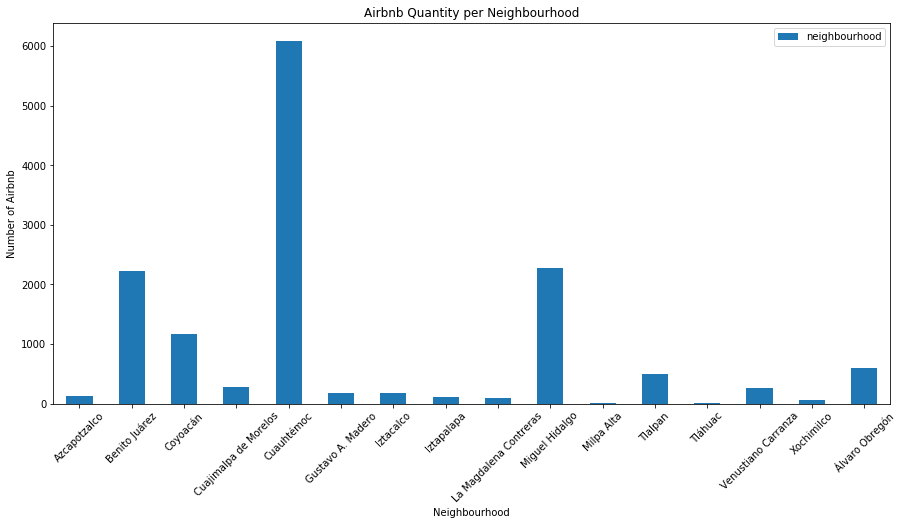

In [67]:
# Create a new frame based on the number of Airbnbs per neighbourhood (called Delegación)
neighbourhood = data_df["neighbourhood"].value_counts().to_frame()

# Sort the index alphabetically and bar-plot
neighbourhood.sort_index().plot(kind = "bar", figsize = (15, 7))

# Add title and labels
plt.title("Airbnb Quantity per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Airbnb")

# Rotate the x names
plt.xticks(rotation = 45)

# Display the plot
plt.show()

## Location vs Price Analysis


### Hypothesis

**Location influences Airbnb price in CDMX**

### Veredict

**True**
* The bar plot shows that, depending on the neighbourhood, mean price increases or decreases.
* The price heatmap gets hotter closer to fancy areas like Polanco, Chapultepec, Roma, Condesa and Zócalo.
* Nicer/touristic neighbourhoods have pricier Airbnbs.
* An area that comes to shine in the private room, in the second bar plot is Tláhuac, a site that includes a very touristic site called Xochimilco lake, which is famous for its boats called Trajineras.

**Special Findings**
* Coajimalpa de Morelos is a fast-growing, fancy neighbourhood, translating into a high demand for living places.
* From the first analysis, we can see that the Airbnb quantity for this area is low, which translates into a poor offer.
* A high demand with a low offer combines to make the best formula for sky-rocket prices, which can be seen in the overall mean pricing and room-type pricing plots.
* From the room-type pricing plot, we an see that it has the highest private room mean price, and second highest full Airbnb price.

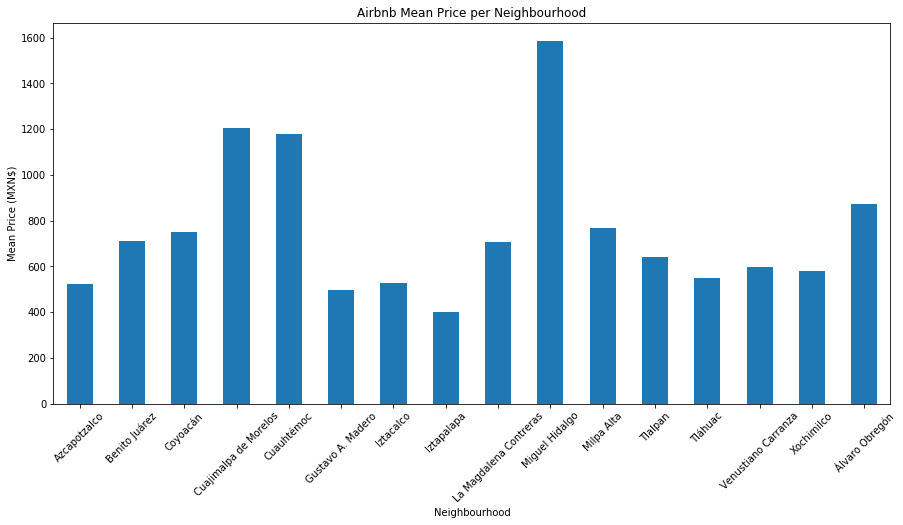

In [68]:
# Plot the mean price per neighbourhood
data_df.groupby(["neighbourhood"])["price"].mean().plot(kind = "bar", figsize = (15, 7))

# Add title and labels
plt.title("Airbnb Mean Price per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price (MXN$)")

# Rotate the x names
plt.xticks(rotation = 45)

# Display the plot
plt.show()

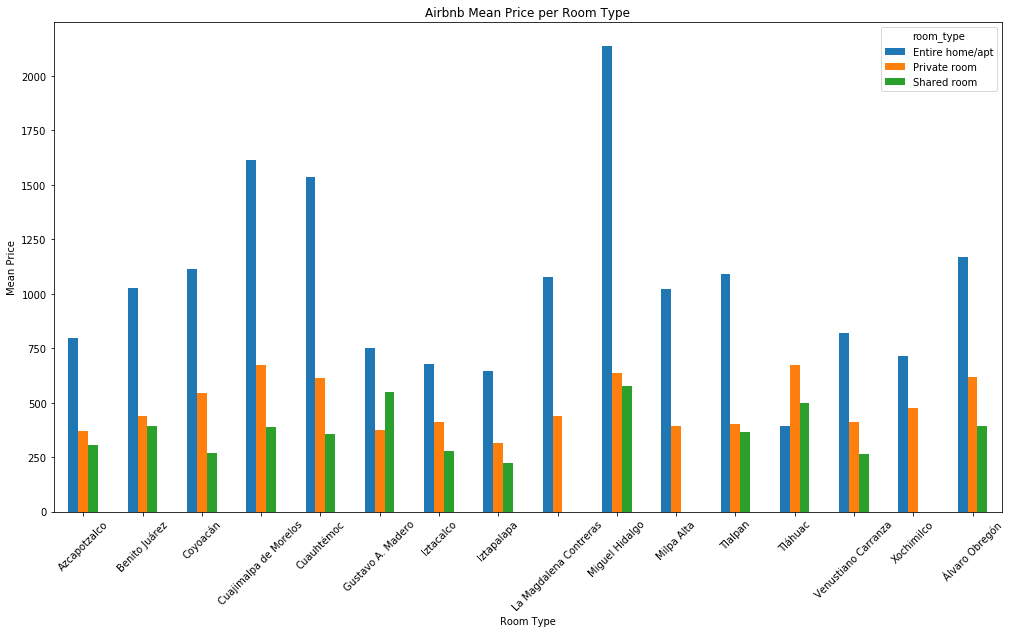

In [69]:
# Create a DataFrame for mean price per room type and neighbourhood
room_price = data_df.groupby(["neighbourhood", "room_type"])["price"].mean().unstack()

# Bar plot the DataFrame
room_price.plot(kind = "bar", figsize = (17,9))

# Add title and labels
plt.title("Airbnb Mean Price per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Mean Price")

# Rotate x names
plt.xticks(rotation = 45)

# Display the plot
plt.show()

In [5]:
# Set locations, price and max intensity for the heatmap
locations = data_df[["latitude", "longitude"]]
price = data_df["price"]
max_int = data_df["price"].max()

In [6]:
# Plot Price heatmap
fig = gmaps.figure()

# Create a heat layer based on locations, price and max price
heat_l = gmaps.heatmap_layer(locations, weights = price, max_intensity = max_int, point_radius = 10)

# Add the heat layer
fig.add_layer(heat_l)

# Display the plot
fig

Figure(layout=FigureLayout(height='420px'))

## Location vs Availability Analysis


### Hypothesis

**Crime influences Airbnb price in CDMX**

### Veredict

**True, with two exceptions**
* The first scatter plot reveals a misleading conclusion that price and crime are directly proportional.
* After thoroughly checking the dataset, we found out that we have two neighbourhoods that have an uninfluenced mean price-crime relation. This two colonies were Miguel Hidalgo and Cuauhtémoc. As explained earlier, these are considered the two best neighbourhoods to live in CDMX, both for tourists and locals. This gives them the highest demand, thus their prices increase in spite of the high crime rates.
* After taking these two neighbourhoods out of the equatioin, we can see that, as crime decreases, mean prices increases.
* This means that crime has an inversely proportional relationship with price.

In [ ]:
# Import the CSV file's selected columns into a DataFranme
delitos_df = pd.read_csv("delitos.csv", usecols = (['alcaldia_hechos', 'delito']))

# Set the DataFrame index
delitos_df.index = delitos_df["alcaldia_hechos"]

# Drop the column with neighbourhoods (it repeats in the index)
delitos_df = delitos_df.drop(columns = "alcaldia_hechos")

# Sort the DataFrame index alphabetically
delitos_df = delitos_df.sort_index()

# delitos_df.head()

In [12]:
# Rename the row to remove the spanish accent
neighbourhood = neighbourhood.rename({"Álvaro Obregón": "Alvaro Obregón"})

# Sort index alphabetically
neighbourhood = neighbourhood.sort_index()

# Create a new column counting the amount of insidences
neighbourhood["insidences"] = ""
for x in range(len(delitos_df)):
    neighbourhood["insidences"][x] = delitos_df["delito"][x]
# neighbourhood.head(16)

C:\Users\Ernesto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
# Create a DataFrame with neighbourhood and mean price
price = data_df.groupby(["neighbourhood"])["price"].mean().to_frame(name = "price")
price = price.sort_index()
neighbourhood["price"] = price["price"]
# neighbourhood.head(16)

The correlation between price and crimes is 0.01


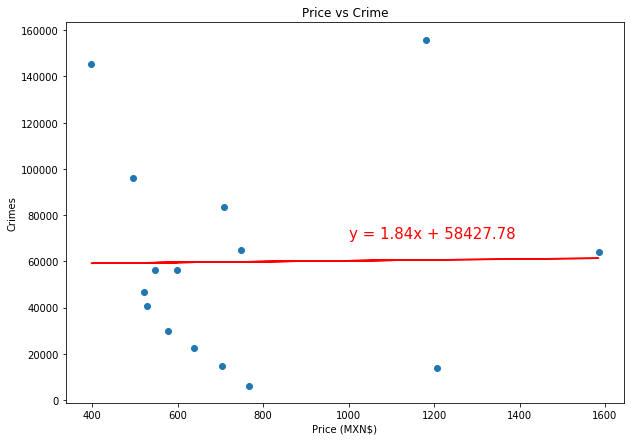

In [62]:
# Create a DataFrame from the three previous 
analysis_df = neighbourhood[["neighbourhood", "price", "insidences"]]

# Drop empty-valued rows
analysis_df = analysis_df.dropna(how = "any")
# analysis_df.head()

# Create a variable for crime and price as integer types
crime = analysis_df["insidences"].astype(int)
priced = analysis_df["price"].astype(int)

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(priced, crime)

# Print the correlation coefficient
print(f'The correlation between price and crimes is {round(correlation[0], 2)}')

# Linear regression function, taking in as arguments the x and y lists, and returning the slope, the intercept
# the r-value, p-value and the stderr
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(priced, crime)

# Linear regression values, multiplying the x list value by the slope and adding the intercept
regress_values = priced*slope+intercept

# Line equation expressed as y = mx + b, where m is the slope and b is the intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)) 

# Create a figure to plot on, set its size
fig6, ax6 = plt.subplots(figsize = (10, 7))

# Pyplot the weight-tumor volume scatter plot
plt.scatter(priced, crime)

# Plot the regression line and annotate its function in the (20, 38) interception
plt.plot(priced, regress_values, "r-")
plt.annotate(line_eq, (1000, 70000), fontsize = 15, color = "red")

# Add title and labels
plt.title("Price vs Crime")
plt.xlabel("Price (MXN$)")
plt.ylabel("Crimes")

# Display the plot in a tight layout
# plt.tight_layout()

# Show the plot
plt.show()

The correlation between price and crimes is -0.56


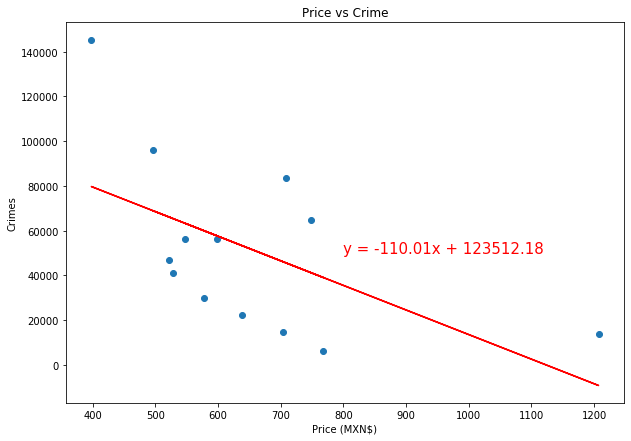

In [64]:
# Create a DataFrame based on the previous one, excludint two columns
analysis_df2 = analysis_df.drop(index = ["Miguel Hidalgo", "Cuauhtémoc"])
# analysis_df.head()

# Create new crime and price variables
crime2 = analysis_df2["insidences"].astype(int)
priced2 = analysis_df2["price"].astype(int)

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(priced2, crime2)

# Print the correlation coefficient
print(f'The correlation between price and crimes is {round(correlation[0], 2)}')

# Linear regression function, taking in as arguments the x and y lists, and returning the slope, the intercept
# the r-value, p-value and the stderr
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(priced2, crime2)

# Linear regression values, multiplying the x list value by the slope and adding the intercept
regress_values = priced2*slope+intercept

# Line equation expressed as y = mx + b, where m is the slope and b is the intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)) 

# Create a figure to plot on, set its size
fig6, ax6 = plt.subplots(figsize = (10, 7))

# Pyplot the weight-tumor volume scatter plot
plt.scatter(priced2, crime2)

# Plot the regression line and annotate its function in the (20, 38) interception
plt.plot(priced2, regress_values, "r-")
plt.annotate(line_eq, (800, 50000), fontsize = 15, color = "red")

# Add title and labels
plt.title("Price vs Crime")
plt.xlabel("Price (MXN$)")
plt.ylabel("Crimes")

# Display the plot in a tight layout
# plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# Import the CSV file into a DataFrame
crime_df = pd.read_csv("cdmx_crimenes.csv")

# Drop empty-valued rows
crime_df = crime_df.dropna(how = "any")

# Count crime incidences per latitudde and create a DataFrame
crime_df = crime_df.groupby(["latitud"])["longitud"].value_counts().to_frame(name = "count").sort_values(by = ["count"]).reset_index()

In [42]:
# Set locations, crime count and max intensity for the heatmap
location = crime_df[["latitud", "longitud"]]
count = crime_df["count"]
max_intense = crime_df["count"].max()

In [44]:
# Plot Price heatmap
fig = gmaps.figure()

# Create a heat layer
heat_2 = gmaps.heatmap_layer(location, weights = count, max_intensity = max_intense, point_radius = 5)

# Add the heat layer
fig.add_layer(heat_2)

# Display the plot
fig

Figure(layout=FigureLayout(height='420px'))